One neuron net, that finds solution for line (linear equation):  
$$y=2x+1$$  
*2 = expected weight*  
*1 = expected bias*

inputs: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10  
outputs: 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21

In [2]:
# only for the case, when you execute it in google colab:
# !pip uninstall tensorflow
# !pip install tensorflow-gpu

In [3]:
import tensorflow as tf

from matplotlib import pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

print(tf.__version__)

2.0.0


In [4]:
inputs = tf.constant([[0.], [1.], [2.], [3.], [4.], [5.], [6.], [7.], [8.], [9.], [10.]], dtype=tf.float32)
outputs = tf.constant([[1.], [3.], [5.], [7.], [9.], [11.], [13.], [15.], [17.], [19.], [21.]], dtype=tf.float32)
inputs, outputs

(<tf.Tensor: id=0, shape=(11, 1), dtype=float32, numpy=
 array([[ 0.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]], dtype=float32)>,
 <tf.Tensor: id=1, shape=(11, 1), dtype=float32, numpy=
 array([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.],
        [15.],
        [17.],
        [19.],
        [21.]], dtype=float32)>)

In [5]:
training_inputs, test_inputs = tf.split(inputs, [7,4], 0)
training_inputs, test_inputs

(<tf.Tensor: id=4, shape=(7, 1), dtype=float32, numpy=
 array([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.]], dtype=float32)>,
 <tf.Tensor: id=5, shape=(4, 1), dtype=float32, numpy=
 array([[ 7.],
        [ 8.],
        [ 9.],
        [10.]], dtype=float32)>)

In [6]:
training_outputs, test_outputs = tf.split(outputs, [7,4], 0)
training_outputs, test_outputs

(<tf.Tensor: id=8, shape=(7, 1), dtype=float32, numpy=
 array([[ 1.],
        [ 3.],
        [ 5.],
        [ 7.],
        [ 9.],
        [11.],
        [13.]], dtype=float32)>,
 <tf.Tensor: id=9, shape=(4, 1), dtype=float32, numpy=
 array([[15.],
        [17.],
        [19.],
        [21.]], dtype=float32)>)

*Plot the data:*

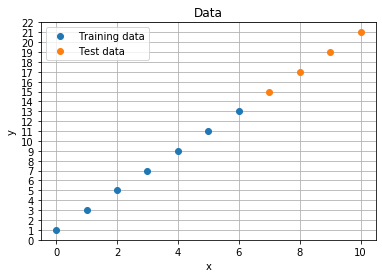

In [7]:
fig, ax = plt.subplots()

ax.plot(training_inputs, training_outputs, marker='o', linestyle='', label='Training data')
ax.plot(test_inputs, test_outputs, marker='o', linestyle='', label='Test data')

ax.set_title('Data')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(True)

plt.show()

1 fully connected (dense) layer with 1 input  
optimizer: Stochastic gradient descent  
loss function: Mean squared error https://en.wikipedia.org/wiki/Mean_squared_error  
$$\frac{1}{n}\sum_{i=1}^n (x_i-\overline{x_i})^2$$  


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='relu'),
])

In [0]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

model.compile(optimizer=optimizer,
              loss='MSE',
              metrics=['accuracy'])

In [10]:
model.fit(training_inputs, training_outputs, epochs=10)

Train on 7 samples
Epoch 1/10
7/7 [==============================] - 1s 74ms/sample - loss: 13.5664 - accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 0s 547us/sample - loss: 7.2464 - accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 0s 543us/sample - loss: 3.9023 - accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 0s 606us/sample - loss: 2.1394 - accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 0s 503us/sample - loss: 1.2097 - accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 0s 482us/sample - loss: 0.7190 - accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 0s 474us/sample - loss: 0.4595 - accuracy: 0.0000e+00
Epoch 8/10
7/7 [==============================] - 0s 493us/sample - loss: 0.3218 - accuracy: 0.0000e+00
Epoch 9/10
7/7 [==============================] - 0s 496us/sample - loss: 0.2484 - accuracy: 0.0000e+00
Epoch 10/10
7/7 [============================

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
predictions = model.predict(test_inputs)
predictions

array([[15.19469 ],
       [17.328337],
       [19.461985],
       [21.59563 ]], dtype=float32)

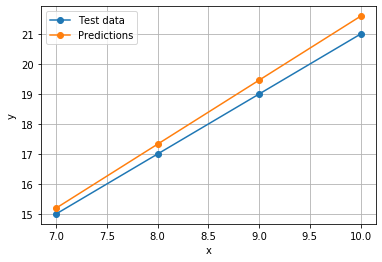

In [13]:
fig, ax = plt.subplots()

ax.plot(test_inputs, test_outputs, marker='o', label='Test data')
ax.plot(test_inputs, predictions, marker='o', label='Predictions')

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.legend()
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.grid(True)

plt.show()

In [14]:
params = model.get_weights()
params

[array([[2.133647]], dtype=float32), array([0.25916135], dtype=float32)]

In [15]:
weight, bias = params
weight = tf.squeeze(weight)
bias = tf.squeeze(bias)
weight, bias

(<tf.Tensor: id=774, shape=(), dtype=float32, numpy=2.133647>,
 <tf.Tensor: id=776, shape=(), dtype=float32, numpy=0.25916135>)